# Cargar Paquetes

# Segmentación de una imagen
La segmentación es el campo del procesamiento de imágenes que divide una imagen digital en varias partes (grupos de pixeles)

Esto permite simplificar la representación de una imagen. Por ejemplo
- Obtener una imagen binaria.
- Obtener los bordes de una imagen.

En este tema estudiaremos un conjunto de algoritmos para determinar la mejor representación de una imagen usando  2 o 3 tonalidades de grises.

Una manera de extraer objetos o partes de una imagen es seleccionar un umbral T:
1. Si la imagen es de formato 8 bits: entonces T=[0,255]
2. Si la imagen está normalizada: T=[0,1]

Para esto, consideremos la siguiente segmentación. Sea A una imagen a escala de grises. Entonces la imagen segmentada B se obtiene de la siguiente manera:

- B(x,y) = { a_1 si A(x,y) e T_1 , a_2 si A(x,y) e T_2 , ... , a_n si A(x,y) e T_n }
    - T_1, T_2 , ... , T_n son una partición de T, es decir, T_1 u T_2 u ... u T_n = T
    - a_1 , ... , a_n son elementos en T, es decir, a_i e T, i = 1, ... , n

Ejemplo: Transofmrada Binaria
- B(x,y) = { 0 si e [0,05[ , 1 si A(x,y) e [0,5,1] }

In [1]:
pkg load signal
pkg load image

In [2]:
from scipy.fftpack import dct,idct
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from scipy.io import savemat

# Umbral Simple y Compuesto

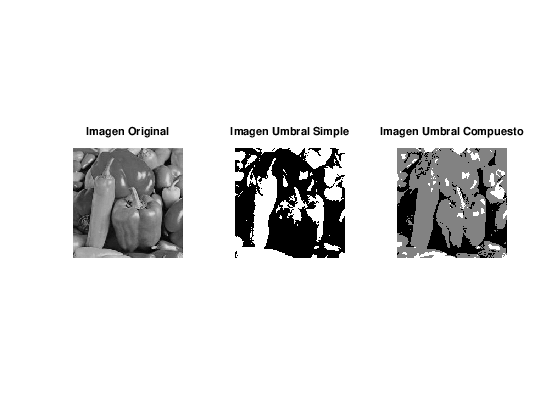

In [3]:
A = imread("images/imagen1.jpg");
subplot(1,3,1);
imshow(A);
title("Imagen Original");

A = im2double(A);
[m,n] = size(A);

%Caso 1: umbral Simple (Imagen Binaria)
T = 0.5; B = zeros(m,n);
B(A>=T) = 1; %T_1 = [0.5,1]
B(A<T) = 0; %T_2 = [0,0,0,5[
subplot(1,3,2)
imshow(B)
title("Imagen Umbral Simple")

%Caso 2: Umbral Compuesto
T1 = 1/3; T2= 2/3; C = zeros(m,n);
C(A>T2) = 1; %[0.66..,1[
C(and(T1<A,A<=T2)) = 0.5; % ]0.33...,0.66...]
C(A<=T1) = 0; %[0,0.33..]
subplot(1,3,3);
imshow(C);
title("Imagen Umbral Compuesto")

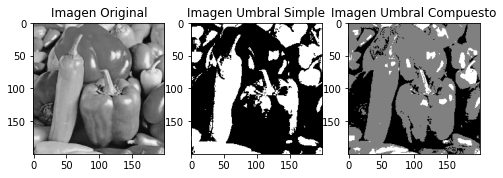

In [4]:
fig = plt.figure(figsize=(8,8))
A = Image.open("images/imagen1.jpg")
A = np.array(A).astype(np.float64)/255
fig.add_subplot(1,3,1).title.set_text("Imagen Original")
plt.imshow(A, cmap=plt.cm.gray)

m,n = np.shape(A)

#Caso 1: Umbral Simple
T = 0.5
B = np.zeros((m,n))
B[A>=T] = 1
B[A<T] = 0
fig.add_subplot(1,3,2).title.set_text("Imagen Umbral Simple")
plt.imshow(B, cmap=plt.cm.gray)

#Caso 2: Umbral Compuesto
T1 = 1/3
T2 = 2/3
C = np.zeros((m,n))
C[A>T2] = 1
C[(A<=T2) & (A>T1)] = 0.5
C[A<T1] = 0
fig.add_subplot(1,3,3).title.set_text("Imagen Umbral Compuesto")
plt.imshow(C, cmap=plt.cm.gray)

# La funcion del ruido en el procesamiento de imágenes usando umbrales

Si una imagen tiene una cantidad definida de escala de grises, el ruido en esta imagen modifica completamente este comportamiento. Este análisis se puede ver más claro usando el histograma de la imagen.

# Umbral e Histograma

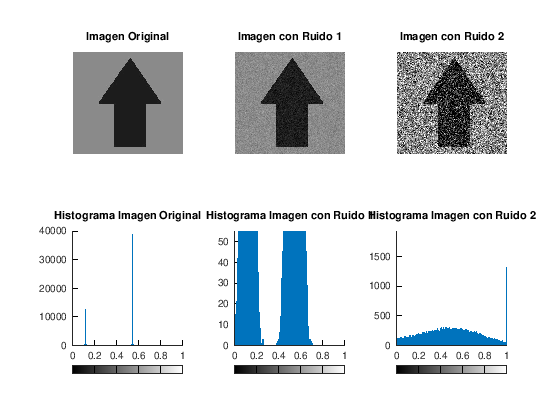

In [5]:
A = imread("images/imagen2.jpg");
A = im2double(A);
subplot(2,3,1);
imshow(A);
title("Imagen Original");

%Histograma Imagen Original
subplot(2,3,4);
imhist(A);
title("Histograma Imagen Original");

%Ruido 1
a1 = 0.2^2;
B1 = A+a1*randn(size(A));
subplot(2,3,2);
imshow(B1);
title("Imagen con Ruido 1");

%Histograma Imagen con Ruido 1
subplot(2,3,5);
imhist(B1);
title("Histograma Imagen con Ruido 1");

%Ruido 2
a2 = 0.5^2;
B2 = A+a2*randn(size(A));
subplot(2,3,3);
imshow(B2);
title("Imagen con Ruido 2");

%Histograma Imagen con Ruido 2
subplot(2,3,6);
imhist(B2);
title("Histograma Imagen con Ruido 2");

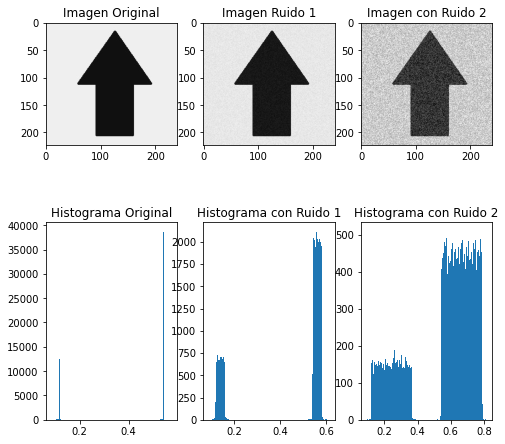

In [6]:
fig = plt.figure(figsize=(8,8))
#Imagen Original
A = Image.open("images/imagen2.jpg")
A = ImageOps.grayscale(A)
A = np.array(A).astype(np.float64)/255
fig.add_subplot(2,3,1).title.set_text("Imagen Original")
plt.imshow(A, cmap=plt.cm.gray)
m,n = np.shape(A)

#Imagen Con Ruido 1
factor = 0.2**2
B = A + factor*np.random.rand(m,n)

fig.add_subplot(2,3,2).title.set_text("Imagen Ruido 1")
plt.imshow(B, cmap=plt.cm.gray)

#Imagen con Ruido 2
factor = 0.5**2
C = A + factor*np.random.rand(m,n)

fig.add_subplot(2,3,3).title.set_text("Imagen con Ruido 2")
plt.imshow(C, cmap=plt.cm.gray)

#Histogram 1
fig.add_subplot(2,3,4).title.set_text("Histograma Original")
plt.hist(A.reshape(-1),bins=256)


#Histogram 2
fig.add_subplot(2,3,5).title.set_text("Histograma con Ruido 1")
plt.hist(B.reshape(-1),bins=256)

#Histogram 3
fig.add_subplot(2,3,6).title.set_text("Histograma con Ruido 2")
plt.hist(C.reshape(-1),bins=256)

plt.show()

# Algoritmos para detectar el umbral óptimo
## Método de umbral Glboal Básico
- Este algoritmo se utiliza cuando los valores de los pixeles son separados en 2 grupos bien definidos. Este algoritmo se comporta de la siguiente manera:
    - Paso 1: Seleccionar un valor inicial de umbral T^(0)
    - Paso 2: Para k = 0,1,2,...
    - Paso 3: Usando T^(k), vamos a dividir la imagen en 2 bloques:
        - B1: Intensidad mayor que T^(k)
        - B2: Intensidad menor o igual que T^(k)
    - Paso 4: Calcule el promedio de intensidad de la imagen original, usando cada bloque. Sea m, el promedio usando el bloque 1 (B1) y sea m2 el promedio usando el bloque (B2)
    - Paso 5: Actualizar el valor del umbral
        - T^(k+1) = (1/2)(m1+m2)
    - Paso 6: Si |T^(k+1) - T^(k)| < tolerancia, detenerse. En caso contrario, k = k+1 y repetir los pasos del 3 al 6.

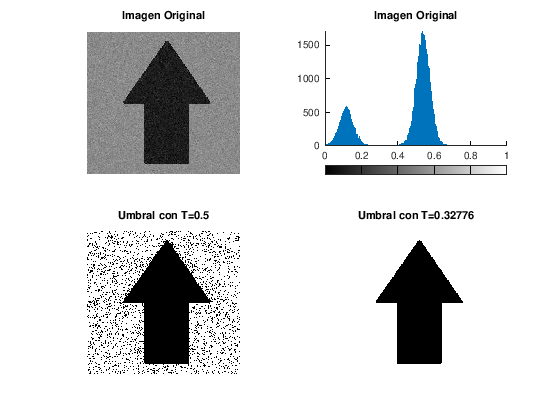

In [7]:
A = imread("images/imagen3.jpg");
A = im2double(A);
subplot(2,2,1);
imshow(A);
title("Imagen Original")

%Histograma de la Imagen Original
subplot(2,2,2);
imhist(A);
title("Imagen Original")
[x,y] = imhist(A);
ylim([0 max(x)])

[m,n] = size(A);

%Metodo 1: Umbral Simple (Binaria)
T = 0.5;
C1 = zeros(m,n);
C1(A > T) = 1;
C1(A <= T) = 0;
subplot(2,2,3);
imshow(C1);
title(["Umbral con T=" num2str(T)]);

%Metodo 2: Umbral Global Basico
%%%%IMPELMENTAR EL ERROR
iter = 15;
for i=1 : iter
    %P1: Dividir la imagen en 2 bloques
    B1 = (A>T);
    B2 = (A<=T);
    
    %Calcular el promedio de intensidad de cada bloque.
    sum1 = sum(sum(B1));
    sum2 = sum(sum(B2));
    
    G1 = zeros(m,n);
    G2 = zeros(m,n);
    
    G1 = A.*B1; %G1 tiene solo los pixeles que cumple A>T
    G2 = A.*B2; %G2 tiene solo los pixeles que cumple A<=T

    m1 = sum(sum(G1))/sum1;
    m2 = sum(sum(G2))/sum2;

    T = 0.5*(m1+m2);
end

C2 = zeros(m,n);
C2(A > T) = 1;
C2(A <= T) = 0;
subplot(2,2,4);
imshow(C2);
title(["Umbral con T=" num2str(T)]);


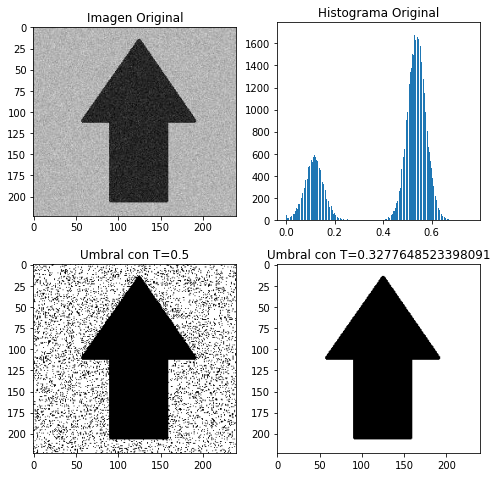

In [8]:
fig = plt.figure(figsize=(8,8))
#Imagen Original
A = Image.open("images/imagen3.jpg")
A = ImageOps.grayscale(A)
A = np.array(A).astype(np.float64)/255
fig.add_subplot(2,2,1).title.set_text("Imagen Original")
plt.imshow(A, cmap=plt.cm.gray)
m,n = np.shape(A)

#Histograma Imagen Original
fig.add_subplot(2,2,2).title.set_text("Histograma Original")
plt.hist(A.reshape(-1), bins=256)

#Método 1: Umbral Simple (Binaria)
T = 0.5
C1 = np.zeros((m,n))
C1[A>T] = 1
C1[A<=T] = 0
fig.add_subplot(2,2,3).title.set_text("Umbral con T=" + str(T))
plt.imshow(C1, cmap=plt.cm.gray)

#Método 2: Umbral Global Básico

iter = 15
for i in range(iter):
    
    #P1: Dividir la imagen en 2 bloques
    B1 = A>T
    B2 = A<=T
    
    #P2: Calcular el promedio de intensidad de cada bloque
    sum1 = B1.sum()

    sum2 = B2.sum()
    
    G1 = np.zeros((m,n))
    G2 = np.zeros((m,n))
    
    
    G1 = A*B1
    G2 = A*B2
    
    m1 = G1.sum()/sum1
    m2 = G2.sum()/sum2
    
    T = 0.5 * (m1+m2)
    
C2 = np.zeros((m,n))
C2[A>T] = 1
C2[A<=T] = 0
fig.add_subplot(2,2,4).title.set_text("Umbral con T=" + str(T))
plt.imshow(C2, cmap=plt.cm.gray)


plt.show()

## Método de Otsu para determinar el valor del umbral
- Este método se tuilzia para realizar umbrales de imagenes de manera automática.
- En la forma más simple, el algoritmo devuelve un umbral de intensidad único que separa los pixeles en 2 clases: Primer plano y Fondo.
- Este umbral se determina maximizando la varianza entre clases
- Ademas, este método es más eficiente que el método del umbral básico global, porque no necesita que los valroes de intensidad esten separados en 2 bloques.

### Algoritmo de Otsu
- Valor inicial: A e R^(mxn) en escala de grises en formato de 8 bits
- Salida: Parámetro T, que representa el valor del umbral

ö = sigma

- Paso 0: Calcular el histograma de A. Sea q e R^(256) que contiene la cantidad de intensidad de la imagen A.
- Paso 1: Calcular el histograma normalizado, h e R^(256).
    - h = (1/(m*n))*q
- Paso 2: Calcular el vector de suma acumulada del histograma normalizado, p e R^(256), p=[p0,p1,...,p255], donde:
    - Pk = sum[i=0,k] (h*c_i)
- Paso 3: Calcular el vector de suma acumulada con peso:
    - (m_c)_k = sum[i=0,k] (i*h*c_i), m_c = [(m_c)_0, (m_c)_1,...,(m_c)_255]
- Paso 4: Calcular el valor máximo de m_c. Lo llamaremos m_g e R.
    - m_g = max(m_c)_k , k = 0,...,255 = (m_c)_255
- Paso 5: Calcular el vector de varianza entre clases. (ö_b)^2 e R^256.
    - ((ö_b)^2)_k = [m_g * p_k - (m_c)_k]^2 / p_k (1-p_k)
- Paso 6: El umbral óptimo es el valor donde se alcanza el máximo vector (ö_b)^2, es decir
    - (ö_b)_T = max k=0,..,255 ((ö_b)^2)_k

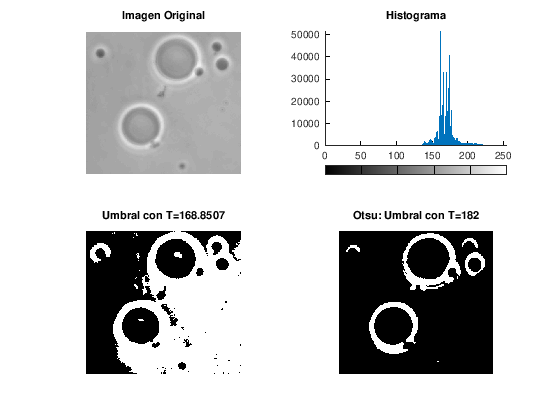

In [9]:
A = imread("images/imagen4.jpg");
subplot(2,2,1);
imshow(A);
title("Imagen Original")

%Histograma de la Imagen Original
subplot(2,2,2);
imhist(A);
title("Histograma")
[x,y] = imhist(A);
ylim([0 max(x)])

[m,n] = size(A);

%Metodo 2: Umbral Global Basico
%%%%IMPELMENTAR EL ERROR
T = 165;
iter = 15;
for i=1 : iter
    %P1: Dividir la imagen en 2 bloques
    B1 = (A>T);
    B2 = (A<=T);
    
    %Calcular el promedio de intensidad de cada bloque.
    sum1 = sum(sum(B1));
    sum2 = sum(sum(B2));
    
    G1 = zeros(m,n);
    G2 = zeros(m,n);
    
    G1 = A.*B1; %G1 tiene solo los pixeles que cumple A>T
    G2 = A.*B2; %G2 tiene solo los pixeles que cumple A<=T

    m1 = sum(sum(G1))/sum1;
    m2 = sum(sum(G2))/sum2;

    T = 0.5*(m1+m2);
end

C2 = zeros(m,n);
C2(A > T) = 1;
C2(A <= T) = 0;
subplot(2,2,3);
imshow(C2);
title(["Umbral con T=" num2str(T)]);

%Método de Otus
%Paso 0
[q,~] = imhist(A);

%Paso 1
h = (1/(m*n))*q;

%Paso 2
p = zeros (256,1);
for k=1 : 256
    p(k) = sum(h(1:k));
end

%Paso 3
mc = zeros (256,1);
for k=1 : 256
    mc(k) = sum([0:k-1]'.*h(1:k));
end

%Paso 4
mg = mc(256);

%Paso 5
vc_num = (mg*p-mc).^2;
vc_den = p.*(1-p);
sigma2b = vc_num./vc_den;

%Paso 6
[~,T] = max(sigma2b);

%Graficar
C3 = zeros(m,n);
C3(A > T) = 1;
C3(A <= T) = 0;
subplot(2,2,4);
imshow(C3);
title(["Otsu: Umbral con T=" num2str(T)]);

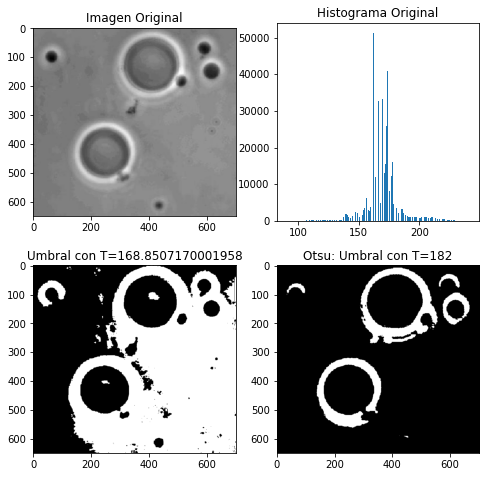

In [10]:
fig = plt.figure(figsize=(8,8))
#Imagen Original
A = Image.open("images/imagen4.jpg")
A = ImageOps.grayscale(A)
A = np.array(A).astype(np.float64)
fig.add_subplot(2,2,1).title.set_text("Imagen Original")
plt.imshow(A, cmap=plt.cm.gray)
m,n = np.shape(A)

#Histograma Imagen Original
fig.add_subplot(2,2,2).title.set_text("Histograma Original")
plt.hist(A.reshape(-1), bins=256)

#Método 2: Umbral Global Básico
T = 165
iter = 15
for i in range(iter):
    
    #P1: Dividir la imagen en 2 bloques
    B1 = A>T
    B2 = A<=T
    
    #P2: Calcular el promedio de intensidad de cada bloque
    sum1 = B1.sum()

    sum2 = B2.sum()
    
    G1 = np.zeros((m,n))
    G2 = np.zeros((m,n))
    
    
    G1 = A*B1
    G2 = A*B2
    
    m1 = G1.sum()/sum1
    m2 = G2.sum()/sum2
    
    T = 0.5 * (m1+m2)
    
C2 = np.zeros((m,n))
C2[A>T] = 1
C2[A<=T] = 0
fig.add_subplot(2,2,3).title.set_text("Umbral con T=" + str(T))
plt.imshow(C2, cmap=plt.cm.gray)

#Método de Otus
#Paso 0
q = np.histogram(A,bins=256, range=(0,255))[0]

#Paso 1
h = (1/(m*n))*q

# %Paso 2
p = np.zeros((256,1))
for k in range(256):
    p[k] = np.sum(h[0:k])

# %Paso 3
mc = np.zeros((256,1))
for k in range(256):
    aux = np.transpose(np.arange(0,k-1))
    mc[k] = np.sum(aux * h[1:k])
# mc = zeros (256,1);
# for k=1 : 256
#     mc(k) = sum([0:k-1]'.*h(1:k));
# end

# %Paso 4
mg = mc[255]

# %Paso 5
vc_num = (mg*p-mc)**2
vc_den = p*(1-p)

sigma2b = np.zeros((256,1))
for i in range(256):
    if vc_den[i] == 0:
        sigma2b[i] = 0
    else:
        sigma2b[i] = vc_num[i]/vc_den[i]

# %Paso 6
T = np.argmax(sigma2b)

# %Graficar
C3 = np.zeros((m,n))
C3[A>T] = 1
C3[A<=T] = 0
fig.add_subplot(2,2,4).title.set_text("Otsu: Umbral con T=" + str(T))
plt.imshow(C3, cmap=plt.cm.gray)

plt.show()

# Compresión de Imagen
Comprimir una imagen es reducir los datos redundantes e irrelevantes de la imagen con la menor pérdida posible de calidad, para permiitr su almacenamiento de forma eficiente.

En el curso, estudiaremos el método JPEG para comprimir imagenes, el cuál, utiliza la transformada de coseno de 2D (DCT-2D)

## Método JPEG:
- JPEG: Joint Photographic Expertts Group: Un comité de expertos que creo un estandar de compresión y codificación de imágenes.
- Inició siendo un método, luego paso a ser un formado de archivo.
- Este método realiza una pérdida de pixeles para disminuir el tamaño. Es decir, que la reconstrucción es una aproximación de la imagen original.
- Dos conceptos fundamentales de este método son la transformada discreta de coseno de @d y el concepto de cuantifiación

C(x,y) = (1/sqrt(2m))p(x)p(y) * sum[i=0][m-1]( sum[j=0][m-1] A(i,j) * cos((2i+1)*x*pi/2m)) * cos((2j+1)*y*pi/2m)) )

donde p(x) = {1/sqrt(2) si k = 0 ; 1 si k > 0}

Nota = Usaremos la función dct2 del paquete "signal" de Octave para calcular la DCT-2D. Ademas, la inversa se calcula con idct2 (Tarea: investigar como calcular matematicamente la inversa de la DCT-2D)

Cuantificación: Es una tecnica de compresión con pérdida que consiste en comprimir un rango de valores a un grupo reducido de valores. Para esto, se necesita una matriz de cuantificación Q. Entonces para cuantificar una matriz A, se realiza la operación:
 - D(x,y) = round(A(x,y)/Q(x,y))
        - D(x,y) = Matriz Cuantificada
        - A(x,y) = Matriz Original
        - Q(x,y) = Matriz de Cuantificación
        
## Algoritmo JPEG (V1: Matriz de 8x8)
### Parte 1: Compresión
Sea A e R(8x8) en formatto de 8 bits

Paso 1: Restar a cada una de las entradas de A el valor 128, es decir,
- M(x,y) = A(x,y) - 128
    - (La DCT-2D está diseñada para trabajar con valores en ]128,127]

Paso 2: Calcular la DCT-2D de M, es decir,
- D = dct2(m)

Paso 3: Dado una matriz de cuanttificación Q_n e R(8x8), obtener la matriz cuantificada C e R(8x8), tal que:
- C(x,y) = round(D(x,y) / Q_n(x,y))
    - Nota: Esta matriz C tiene los valroes comprimidos de la matriz A
    
Paso 4: Codificar la matriz en un vector x e R(p), donde p << 64. Para esto, utilizaremos el metodo zig-zag
 - Metodo Zig-zag: Este método se utiliza para almacenar en un vecotr los valores de la matriz A, cuando los valores diferentes de 0 se encuentra agrupadas en la parter superior izq de dicha mattriz.

### Parte 2: Reconstrucción
Sea x e R(p), p << 64.

Paso 1: Convertir el vector x a una matriz C_r e R(8x8) (proceso inverso del método zig-zag)
Paso 2: Multiplicar cada una de las entrdas de C_r con la entrada respectiva de la matriz de cuantización Q_n, es decir
- M(x,y) = C_r(x,y) * Q(x,y)
Paso 3: Calcular la inversa de la DCT-2D a la matriz M.
- P = idct2(M)
Paso 4: Redondear valores de D y sumar 128.
- A_r = round(D) + 128

In [11]:
function x=mat2vect_diag(C)
  [n,~]=size(C);

  x=[C(1,1)]; s=sum(sum(abs(C)));

  %Primeras n diagonales
  for i=2:n
    for j=1:i
      if mod(i,2)==0
         x=[x C(j,i-j+1)];
      else
         x=[x C(i-j+1,j)];
      end  
    end  
    if sum(abs(x))==s
      break
    end    
  end

  if mod(n,2)==1
    in=1; fin=n-1; pp=0;
  else
    in=2; fin=n; pp=1;
  end

  %Segundas Diagonales
  for i=1:n-1
    if sum(abs(x))==s
      break
    end  
    k=1;
    for j=i+1:n
      if mod(i,2)==pp
         x=[x C(n-k+1,j)];
      else     
         x=[x C(j,n-k+1)];
      end 
      k=k+1; 
    end  
  end
end

In [12]:
def mat2vect_diag(C):
    n,_ = np.shape(C)
    x = [C[0,0]]
    s = np.sum(np.absolute(C))
    #Primeras n diagonles
    
    for i in range(1,n):
        for j in range(i+1):
            if ((i+1)%2) == 0:
                x.append(C[j,i-j])
                
            else:
                x.append(C[i-j,j])
        if np.sum(np.absolute(x)) == s:
            break
    
    if (n%2) == 1:
        pp = 0
    else:
        pp = 1
    
    #Segundas Diagonales
    for i in range(n-1):
        if np.sum(np.absolute(x)) == s:
            break
        k =0
        for j in range (i+1,n):
            if ((i+1)%2) == pp:
                x.append(C[n-k-1,j])
            else:
                x.append(C[j,n-k-1])
            k += 1
    
    return x

In [13]:
function C=vect2mat_diag(x)
  t=length(x); n=8; C=zeros(n);
  k=1; C(1,1)=x(k);
  %Primeras n diagonales
  for i=2:n
    for j=1:i
      k=k+1;
      if mod(i,2)==0
         C(j,i-j+1)=x(k);
      else     
         C(i-j+1,j)=x(k);
      end 
    end 
    if t==k
      break
    end    
  end
  %Segundas Diagonales
  for i=1:n-1     
    r=1;
    if t==k
      break
    end
    for j=i+1:n
      k=k+1;     
      if mod(i,2)==1
         C(n-r+1,j)=x(k);
      else     
         C(j,n-r+1)=x(k);
      end 
      r=r+1;
      if t==k
        break
      end  
    end    
  end
end

In [14]:
def vect2mat_diag(x):
    t = len(x)-1
    n = 8
    C = np.zeros((n,n))
    k = 0
    C[0,0] = x[k]
    
    #Primeras n diagonales
    for i in range(1,n):
        for j in range(i+1):
            k += 1
            if (i+1)%2 == 0:
                C[j,i-j] = x[k]
            else:
                C[i-j,j] = x[k]
        if t == k:
            break
    
    #Segundas Diagonales
    
    for i in range(n-1):
        r = 0
        if t == k:
            break
        for j in range (i+1,n):
            k+=1
            if (i+1)%2 == 1:
                C[n-r-1,j] = x[k]
            else:
                C[j,n-r-1] = x[k]
            r += 1
            if t == k:
                break
    return C

In [15]:
%%COMPRESION%%

%Mattriz de tamaño 8x8
A =[154 123 123 123 123 123 123 136;
    192 180 136 154 154 154 136 110;
    254 198 154 154 180 154 123 123;
    239 180 136 180 180 166 123 123;
    180 154 136 167 166 149 136 136;
    128 136 123 136 154 180 198 154;
    123 105 110 149 136 136 180 166;
    110 136 123 123 123 136 154 136];
    
%Paso 1: restar 128 a cada entrda
M = A - 128;

%Paso 2: Calcular la DCT-2D
D = dct2(M);

%Paso 3: Obtener matriz cuantificada
Q =[16 11 10 16 24 40 51 61;
    12 12 14 19 26 58 60 55;
    14 13 16 24 40 57 59 56;
    14 17 22 29 51 87 80 62;
    18 22 37 56 68 109 103 77;
    24 35 55 64 81 104 113 92;
    49 64 78 87 103 121 120 101;
    72 92 95 98 112 100 103 99];
    
C = round(D./Q);

%Paso 4: Codificar matriz C en un vector x
x = mat2vect_diag(C);


%%RECONSTRUCCION%%
%Paso 1: Convertir x en una matriz de 8x8
Cr = vect2mat_diag(x);

%Paso 2: Multiplicar puntualmente la Cr y Q
M = Cr.*Q;

%Paso 3: Calcular la inversa de DCT-2D a M
P = idct2(M);

%Paso 4: Redondear P y sumar 128 a cada entrada
Ar = round(P) + 128;

In [16]:
#COMPRESION

#Mattriz de tamaño 8x8
A =[[154, 123, 123, 123, 123, 123, 123, 136],
    [192, 180, 136, 154, 154, 154, 136, 110],
    [254, 198, 154, 154, 180, 154, 123, 123],
    [239, 180, 136, 180, 180, 166, 123, 123],
    [180, 154, 136, 167, 166, 149, 136, 136],
    [128, 136, 123, 136, 154, 180, 198, 154],
    [123, 105, 110, 149, 136, 136, 180, 166],
    [110, 136, 123, 123, 123, 136, 154, 136]]
A = np.array(A)    

# Paso 1: restar 128 a cada entrda
M = A - 128

# Paso 2: Calcular la DCT-2D # dct,idct
D = dct(dct(M.T, type=2, norm = "ortho").T, type=2, norm = "ortho")

# Paso 3: Obtener matriz cuantificada
Q =[[16, 11, 10, 16, 24, 40, 51, 61],
    [12, 12, 14, 19, 26, 58, 60, 55],
    [14, 13, 16, 24, 40, 57, 59, 56],
    [14, 17, 22, 29, 51, 87, 80, 62],
    [18, 22, 37, 56, 68, 109, 103, 77],
    [24, 35, 55, 64, 81, 104, 113, 92],
    [49, 64, 78, 87, 103, 121, 120, 101],
    [72, 92, 95, 98, 112, 100, 103, 99]]
Q = np.array(Q)

C = np.round(np.divide(D,Q))

# Paso 4: Codificar matriz C en un vector x
x = mat2vect_diag(C);


# RECONSTRUCCION
# Paso 1: Convertir x en una matriz de 8x8
Cr = vect2mat_diag(x);

# Paso 2: Multiplicar puntualmente la Cr y Q
M = Cr*Q


# Paso 3: Calcular la inversa de DCT-2D a M
P = idct(idct(M.T, type=2, norm='ortho').T, type=2, norm='ortho')


# Paso 4: Redondear P y sumar 128 a cada entrada
Ar = np.round(P) + 128


In [17]:
%%COMPRESION%%

%Mattriz de tamaño 8x8
A =[154 123 123 123 123 123 123 136;
    192 180 136 154 154 154 136 110;
    254 198 154 154 180 154 123 123;
    239 180 136 180 180 166 123 123;
    180 154 136 167 166 149 136 136;
    128 136 123 136 154 180 198 154;
    123 105 110 149 136 136 180 166;
    110 136 123 123 123 136 154 136];
    
%Paso 1: restar 128 a cada entrda
M = A - 128;

%Paso 2: Calcular la DCT-2D
D = dct2(M);

%Paso 3: Obtener matriz cuantificada
Q50 =[16 11 10 16 24 40 51 61;
    12 12 14 19 26 58 60 55;
    14 13 16 24 40 57 59 56;
    14 17 22 29 51 87 80 62;
    18 22 37 56 68 109 103 77;
    24 35 55 64 81 104 113 92;
    49 64 78 87 103 121 120 101;
    72 92 95 98 112 100 103 99];
    
n = 100;
if n == 100
    Q = ones(8);
elseif n > 50
    Q = ((100-n)/50)*Q50;
else
    Q = ((50)/n)*Q50;
endif
    
C = round(D./Q);

%Paso 4: Codificar matriz C en un vector x
x = mat2vect_diag(C);


%%RECONSTRUCCION%%
%Paso 1: Convertir x en una matriz de 8x8
Cr = vect2mat_diag(x);

%Paso 2: Multiplicar puntualmente la Cr y Q
M = Cr.*Q;

%Paso 3: Calcular la inversa de DCT-2D a M
P = idct2(M);

%Paso 4: Redondear P y sumar 128 a cada entrada
Ar = round(P) + 128

Ar =

   154   123   123   123   123   123   123   136
   192   180   136   154   154   154   135   110
   254   198   154   154   180   154   123   123
   239   180   136   180   180   165   123   123
   180   154   136   166   166   149   136   136
   128   136   123   135   154   180   198   154
   123   105   110   149   136   136   180   166
   110   136   123   123   123   136   154   136



In [18]:
#COMPRESION

#Mattriz de tamaño 8x8
A =[[154, 123, 123, 123, 123, 123, 123, 136],
    [192, 180, 136, 154, 154, 154, 136, 110],
    [254, 198, 154, 154, 180, 154, 123, 123],
    [239, 180, 136, 180, 180, 166, 123, 123],
    [180, 154, 136, 167, 166, 149, 136, 136],
    [128, 136, 123, 136, 154, 180, 198, 154],
    [123, 105, 110, 149, 136, 136, 180, 166],
    [110, 136, 123, 123, 123, 136, 154, 136]]
A = np.array(A)    

# Paso 1: restar 128 a cada entrda
M = A - 128

# Paso 2: Calcular la DCT-2D # dct,idct
D = dct(dct(M.T, type=2, norm = "ortho").T, type=2, norm = "ortho")

# Paso 3: Obtener matriz cuantificada
Q50 =[[16, 11, 10, 16, 24, 40, 51, 61],
    [12, 12, 14, 19, 26, 58, 60, 55],
    [14, 13, 16, 24, 40, 57, 59, 56],
    [14, 17, 22, 29, 51, 87, 80, 62],
    [18, 22, 37, 56, 68, 109, 103, 77],
    [24, 35, 55, 64, 81, 104, 113, 92],
    [49, 64, 78, 87, 103, 121, 120, 101],
    [72, 92, 95, 98, 112, 100, 103, 99]]
Q = np.array(Q)
    
n = 100
if n == 100:
    Q = np.ones((8,8))
elif n > 50:
    Q = ((100-n)/50)*Q50
else:
    Q = ((50)/n)*Q50
    
    
C = np.round(np.divide(D,Q))


# Paso 4: Codificar matriz C en un vector x
x = mat2vect_diag(C);


# RECONSTRUCCION
# Paso 1: Convertir x en una matriz de 8x8
Cr = vect2mat_diag(x);

# Paso 2: Multiplicar puntualmente la Cr y Q
M = Cr*Q


# Paso 3: Calcular la inversa de DCT-2D a M
P = idct(idct(M.T, type=2, norm='ortho').T, type=2, norm='ortho')


# Paso 4: Redondear P y sumar 128 a cada entrada
Ar = np.round(P) + 128
print(Ar)

[[154. 123. 123. 123. 123. 123. 123. 136.]
 [192. 180. 136. 154. 154. 154. 135. 110.]
 [254. 198. 154. 154. 180. 154. 123. 123.]
 [239. 180. 136. 180. 180. 165. 123. 123.]
 [180. 154. 136. 166. 166. 149. 136. 136.]
 [128. 136. 123. 135. 154. 180. 198. 154.]
 [123. 105. 110. 149. 136. 136. 180. 166.]
 [110. 136. 123. 123. 123. 136. 154. 136.]]


#### Función Compresión

In [19]:
function x = jpeg_compresion(A,comp)

    M = A - 128;
    D = dct2(M);
    Q50 =[16 11 10 16 24 40 51 61;
        12 12 14 19 26 58 60 55;
        14 13 16 24 40 57 59 56;
        14 17 22 29 51 87 80 62;
        18 22 37 56 68 109 103 77;
        24 35 55 64 81 104 113 92;
        49 64 78 87 103 121 120 101;
        72 92 95 98 112 100 103 99];
        
    if comp == 100
         Q = ones(8);
    elseif comp > 50
         Q = ((100-comp)/50)*Q50;
    else
         Q = ((50)/comp)*Q50;
    end
         
    C = round(D./Q);

    %Paso 4: Codificar matriz C en un vector x
    x = mat2vect_diag(C);
    
end


In [20]:
def jpeg_compresion(A,comp):
    A = np.array(A)
    M = A - 128;
    D = dct(dct(M.T, type=2, norm = "ortho").T, type=2, norm = "ortho")
    
    Q50 =[[16, 11, 10, 16, 24, 40, 51, 61],
        [12, 12, 14, 19, 26, 58, 60, 55],
        [14, 13, 16, 24, 40, 57, 59, 56],
        [14, 17, 22, 29, 51, 87, 80, 62],
        [18, 22, 37, 56, 68, 109, 103, 77],
        [24, 35, 55, 64, 81, 104, 113, 92],
        [49, 64, 78, 87, 103, 121, 120, 101],
        [72, 92, 95, 98, 112, 100, 103, 99]]
    Q50 = np.array(Q50)

    if comp == 100:
         Q = np.ones((8,8))
    elif comp > 50:
         Q = ((100-comp)/50)*Q50
    else:
         Q = ((50)/comp)*Q50
    
    C = np.round(np.divide(D,Q))
    x = mat2vect_diag(C)
    
    return x

#### Función Descompresión

In [21]:
function Ar = jpeg_decompresion(x,comp)
    Cr = vect2mat_diag(x);
    
    Q50 =[16 11 10 16 24 40 51 61;
    12 12 14 19 26 58 60 55;
    14 13 16 24 40 57 59 56;
    14 17 22 29 51 87 80 62;
    18 22 37 56 68 109 103 77;
    24 35 55 64 81 104 113 92;
    49 64 78 87 103 121 120 101;
    72 92 95 98 112 100 103 99];
        
    if comp == 100
         Q = ones(8);
    elseif comp > 50
         Q = ((100-comp)/50)*Q50;
    else
         Q = ((50)/comp)*Q50;
    end
    
    M = Cr.*Q;
    P = idct2(M);
    Ar = round(P) + 128;

end

In [22]:
def jpeg_decompresion(x,comp):
    Cr = vect2mat_diag(x)
    
    Q50 =[[16, 11, 10, 16, 24, 40, 51, 61],
        [12, 12, 14, 19, 26, 58, 60, 55],
        [14, 13, 16, 24, 40, 57, 59, 56],
        [14, 17, 22, 29, 51, 87, 80, 62],
        [18, 22, 37, 56, 68, 109, 103, 77],
        [24, 35, 55, 64, 81, 104, 113, 92],
        [49, 64, 78, 87, 103, 121, 120, 101],
        [72, 92, 95, 98, 112, 100, 103, 99]]
    Q50 = np.array(Q50)

    if comp == 100:
         Q = np.ones((8,8))
    elif comp > 50:
         Q = ((100-comp)/50)*Q50
    else:
         Q = ((50)/comp)*Q50
    
    M = Cr*Q
    P = idct(idct(M.T, type=2, norm='ortho').T, type=2, norm='ortho')
    Ar = np.round(P) + 128
    
    return Ar

m =  512


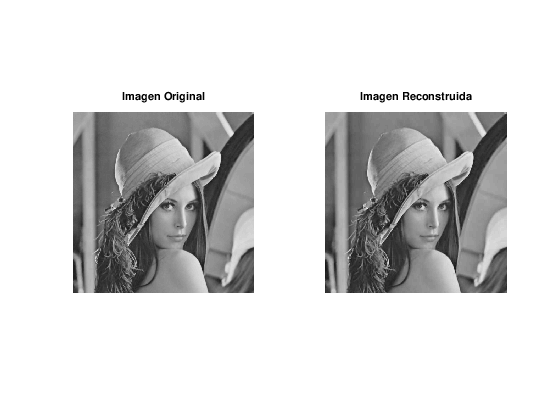

In [23]:
A = imread("images/lena.jpg");
subplot(1,2,1)
imshow(A)
title("Imagen Original")

A = double(A);

save("images/img_original.mat","A");

%Paso 1: Compresion
[m,~] = size(A)
k = m/8; %La imagen tiene k x k bloques de 8 x 8

C = cell(k,k); %Arreglo que contiene en cada entrada el vector comprimido de cada bloque

comp = 50; %Compresion
num_pix = 0;

for i=1:k
     for j=1:k
          Bloque = A(8*(i-1)+1:8*i , 8*(j-1)+1:8*j); %Obtener los bloques 8 x 8
          x = jpeg_compresion(Bloque, comp); %IMPELEMENTAR FUNCION x = jpeg_compresion(A, comp)
          C(i,j) = x;
          num_pix=num_pix+length(x);
     end
end

save("images/img_comprimida.mat","C")

%Paso 2: Reconstruccion
Ar = zeros(512,512);
for i=1:k
     for j=1:k
          x = cell2mat(C(i,j));
          Aux = jpeg_decompresion(x,comp); %Descomprimir en una matriz de 8x8 %IMPLEMENTAR FUNCION x = jpeg_decompresion(A,comp)

          Ar(8*(i-1)+1:8*i , 8*(j-1)+1:8*j) = Aux; %Asignar a la imagen de salida
          end
end

Ar = uint8(Ar);
subplot(1,2,2);
imshow(Ar);
title("Imagen Reconstruida")

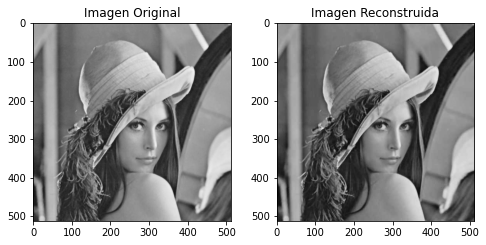

In [24]:
fig = plt.figure(figsize=(8,8))
#Imagen Original
A = Image.open("images/lena.jpg")
A = ImageOps.grayscale(A)
A = np.array(A).astype(np.float64)

fig.add_subplot(2,2,1).title.set_text("Imagen Original")
plt.imshow(A, cmap=plt.cm.gray)
m,n = np.shape(A)

savemat("images/img_original_python.mat",{"A":A})
C = []

comp = 50
num_pix = 0
k = m//8

for i in range(k):
    temp = []
    for j in range(k):
        Bloque = A[8*i:8*(i+1), 8*(j):8*(j+1)]
        x = jpeg_compresion(Bloque,comp)
        temp.append(x)

    C.append(temp)

savemat("images/img_comprimida", {"C":C})

# Paso 2: Reconstruccion

Ar = np.zeros((512,512))
for i in range(k):
    for j in range(k):
        x = C[i][j]
        Aux = jpeg_decompresion(x,comp)
        Ar[8*i:8*(i+1),8*j:8*(j+1)] = Aux
        
fig.add_subplot(2,2,2).title.set_text("Imagen Reconstruida")
plt.imshow(Ar, cmap=plt.cm.gray)

# for i=1:k
#      for j=1:k
#           x = cell2mat(C(i,j));
#           Aux = jpeg_decompresion(x,comp); %Descomprimir en una matriz de 8x8 %IMPLEMENTAR FUNCION x = jpeg_decompresion(A,comp)

#           Ar(8*(i-1)+1:8*i , 8*(j-1)+1:8*j) = Aux; %Asignar a la imagen de salida
#           end
# end

# Ar = uint8(Ar);
# subplot(1,2,2);
# imshow(Ar);
# title("Imagen Reconstruida")
